In [1]:
# standard imports
import numpy as np
import pandas as pd
from scipy import stats, integrate

# graphing imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.DataFrame(np.random.randn(10, 4), index=list('ABCDEFGHIJ'), columns=['col1', 'col2', 'col3', 'col4'])

df

,col1,col2,col3,col4
A,-1.355400,-0.861649,0.645087,1.193269
B,-1.536326,-0.486782,0.094806,-0.601760
C,0.988990,0.813178,-2.336293,-2.216401
D,-0.503517,-1.370450,-0.111440,1.548014
E,-2.763017,-0.469611,-1.374566,0.932886
F,-1.498747,-0.359690,-1.898368,-0.232394
G,0.333685,-0.752933,0.690040,-1.072773
H,-1.322487,0.184769,0.625073,-1.110285
I,-2.127653,0.220151,0.022963,0.132842
J,-0.021498,1.726349,1.547961,-0.773205


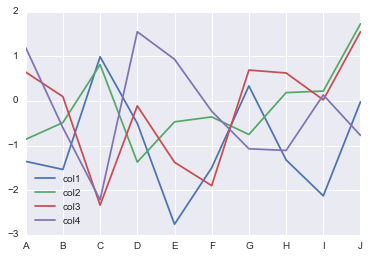

In [3]:
sns.set_style('darkgrid')
df.plot()

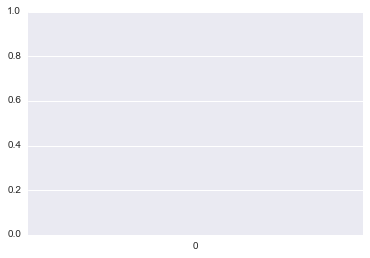

In [4]:
sns.boxplot()

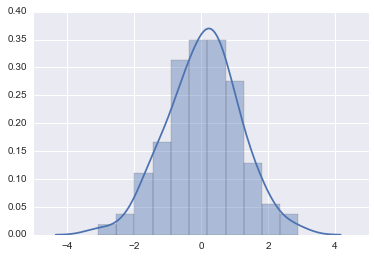

In [5]:
x = np.random.normal(size=100)
sns.distplot(x)

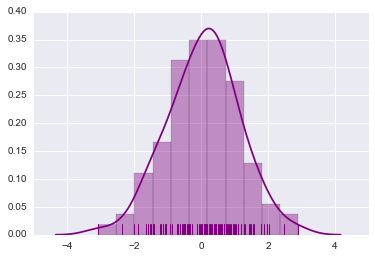

In [6]:
sns.distplot(x, rug=True, color='purple')

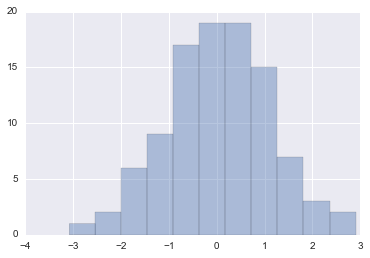

In [7]:
sns.distplot(x, kde=False)

In [8]:
y = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * y.std() * y.size ** (-1/5.)
support = np.linspace(-4, 4, 200)

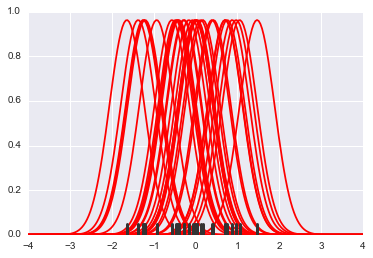

In [9]:
kernals = []

for y_i in y:
    kernal = stats.norm(y_i, bandwidth).pdf(support)
    kernals.append(kernal)
    plt.plot(support, kernal, color='r')

sns.rugplot(y, color=".2", linewidth=3)

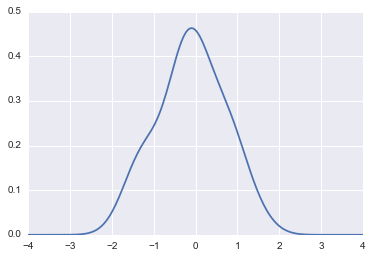

In [10]:
density = np.sum(kernals, axis=0)
density /= integrate.trapz(density, support)
plt.plot(support, density)

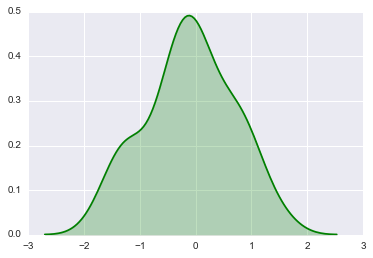

In [11]:
sns.kdeplot(y, shade=True, color='green')

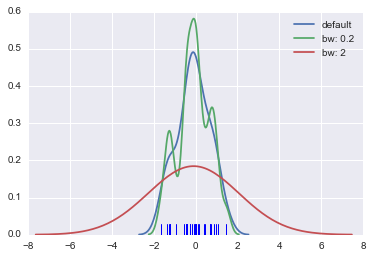

In [12]:
sns.kdeplot(y, label='default')
sns.kdeplot(y, bw=.2, label="bw: 0.2")
sns.kdeplot(y, bw=2, label='bw: 2')
sns.rugplot(y)
plt.legend()

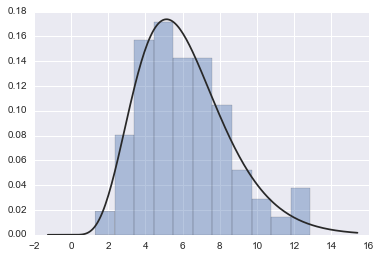

In [13]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma)

In [14]:
mean, cov = [0, 1], [(1, 0.5), (0.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=['col_X', 'col_Y'])
df.head()

,col_X,col_Y
0,-0.235787,1.333824
1,1.007510,1.801712
2,1.184436,1.012157
3,-0.311365,1.947277
4,0.224207,2.223055


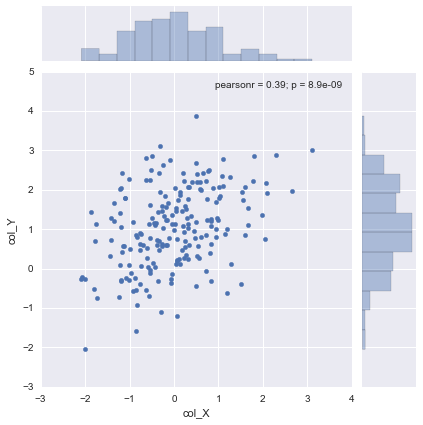

In [15]:
sns.jointplot(x='col_X', y='col_Y', data=df)

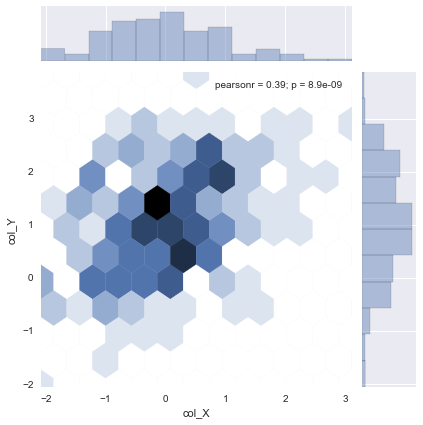

In [16]:
sns.axes_style('white')
sns.jointplot(x='col_X', y='col_Y', data=df, kind='hex')

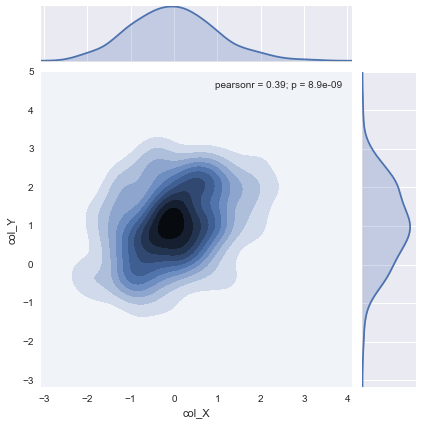

In [17]:
sns.set_style('darkgrid')
sns.jointplot(x='col_X', y='col_Y', data=df, kind='kde')

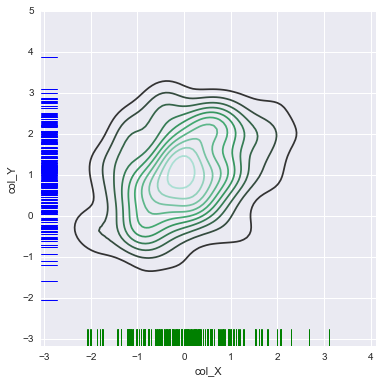

In [18]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df['col_X'], df['col_Y'], ax=ax)
sns.rugplot(df.col_X, color='g', ax=ax)
sns.rugplot(df.col_Y, vertical=True, ax=ax)

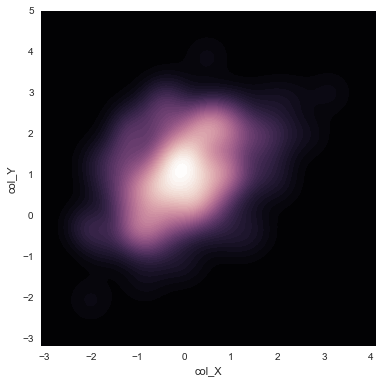

In [19]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.col_X, df.col_Y, cmap=cmap, n_levels=60, shade=True)

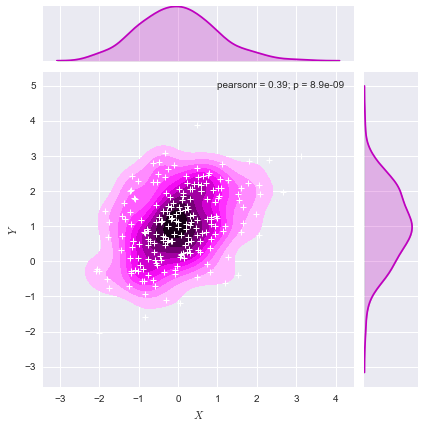

In [20]:
g = sns.jointplot(x='col_X', y='col_Y', data=df, kind='kde', color='m')
g.plot_joint(plt.scatter, c='w', s=30, linewidth=1, marker='+')
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")

In [21]:
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


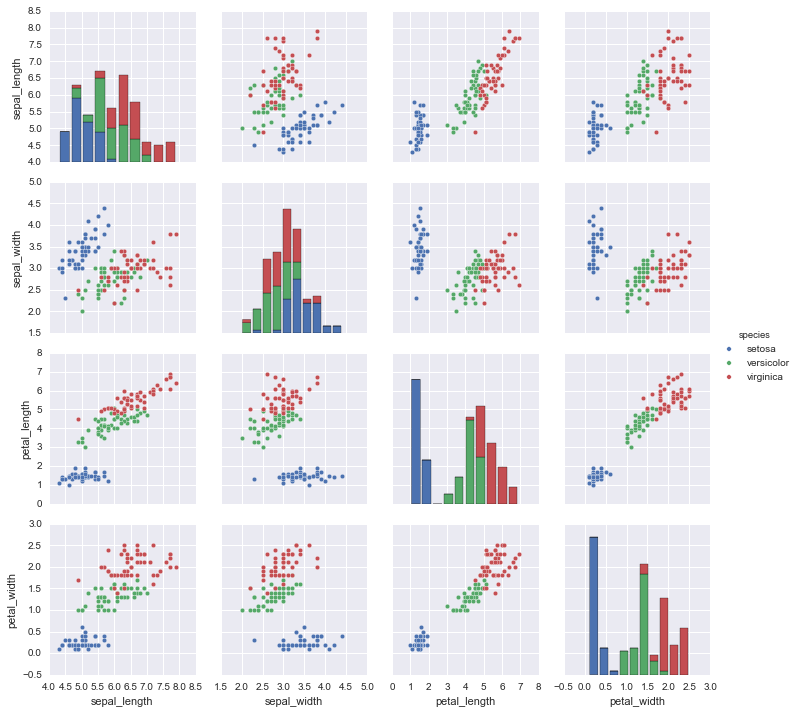

In [22]:
sns.pairplot(iris_df, hue='species')

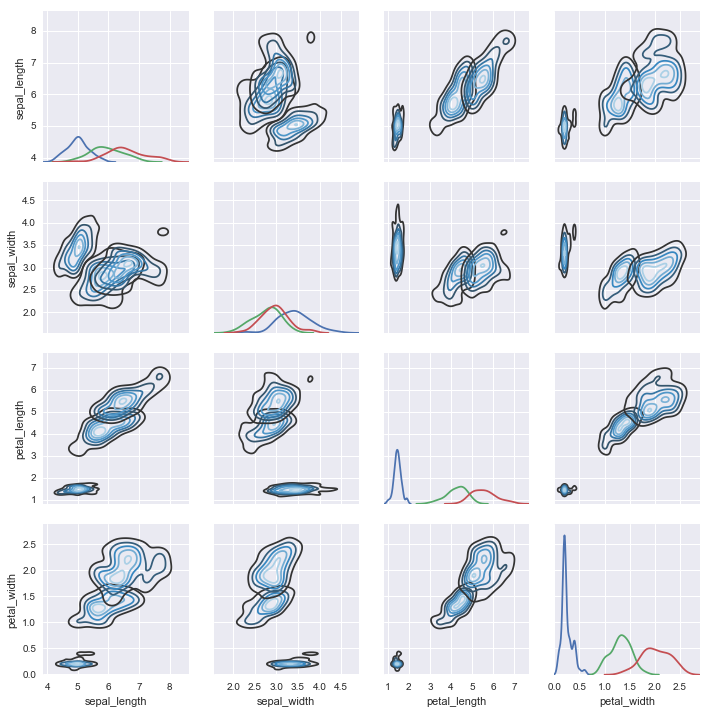

In [23]:
g = sns.PairGrid(iris_df, hue='species')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap='Blues_d', n_levels=6)

C:\Users\SZahn\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


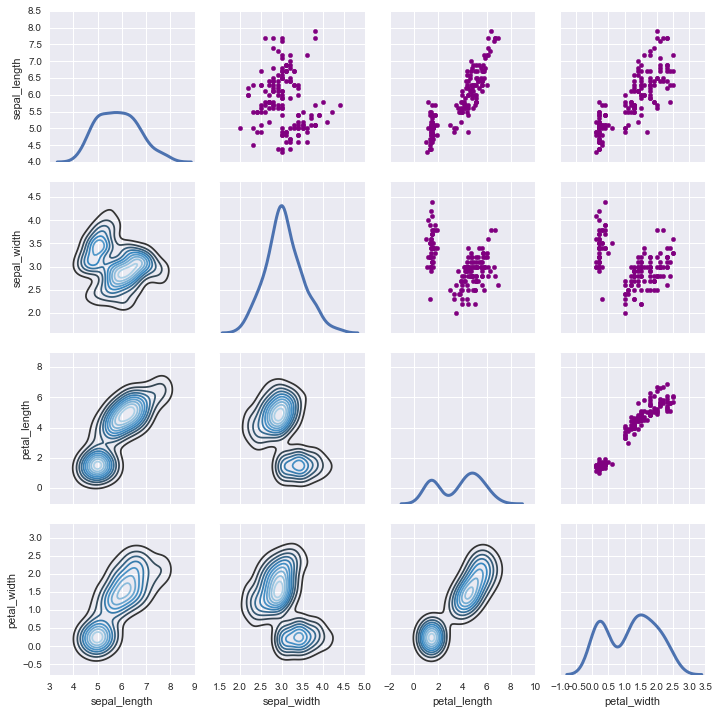

In [24]:
g = sns.PairGrid(iris_df)
g.map_upper(plt.scatter, color='purple')
g.map_lower(sns.kdeplot, cmap='Blues_d')
g.map_diag(sns.kdeplot, lw=3)